<a href="https://colab.research.google.com/github/MaxSMCON/Group_2/blob/main/Group_2_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 2 Project

## Global food in 

in this project we are going to investigate 

In [50]:
# https://drive.google.com/file/d/1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY/view?usp=sharing




In [51]:
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
import seaborn as sns
%matplotlib inline
from IPython.display import display
import requests
import io
from io import StringIO
# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import f1_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn import metrics

# StatsModel
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
# 1MfuleO34g6ZP1saJ1Ej7J7p4SCWYkAmG1MfuleO34g6ZP1saJ1Ej7J7p4SCWYkAmG
#https://drive.google.com/file/d/1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY/view?usp=sharing

# https://drive.google.com/file/d/1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY/view?usp=sharing

# Introduction

### Some functions

In [53]:
def description(df):
  print(df.shape)
  print('null values\n',df.isnull().sum())
  print(df.info())
  print(df.head())
  return


# Loading the Global Food dataset from google drive [Fact Table]


In [54]:
!pip install googledrivedownloader #black magic
from google_drive_downloader import GoogleDriveDownloader as gdd
gdd.download_file_from_google_drive(file_id="1SbW8ns8H5HDE0FVH5pvZ5GkGUdPV_RgY",
                                    dest_path="./global_food_prices.csv",
                                    unzip=False)
data = pd.read_csv("global_food_prices.csv")
df = data.copy()
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [55]:
df[df['um_name'] == '12 KG' ]

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
363064,45.0,Cameroon,816,Centre,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,1,2015,2500.0000,NaN
363065,45.0,Cameroon,816,Centre,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,2,2015,2500.0000,NaN
363066,45.0,Cameroon,816,Centre,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,3,2015,2500.0000,NaN
363067,45.0,Cameroon,816,Centre,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,4,2015,2700.0000,NaN
363068,45.0,Cameroon,816,Centre,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,5,2015,2700.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876051,249.0,Turkey,3057,NaN,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,12,2020,102.3353,NaN
1876052,249.0,Turkey,3057,NaN,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,1,2021,7.3209,NaN
1876053,249.0,Turkey,3057,NaN,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,2,2021,7.3257,NaN
1876054,249.0,Turkey,3057,NaN,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,3,2021,7.2588,NaN


Cover mp_price with UOM

In [56]:
url2 ='https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/UOM_conversion_file.csv'
df_UOM =pd.read_csv(url2, encoding = 'latin-1')

dftest = df.merge(df_UOM,how='left', on= ['cm_name','um_name'],)
df['mp_price'] = np.where(dftest['Conversion_Multiplier'] > 0, dftest['mp_price']*dftest['Conversion_Multiplier'], dftest['mp_price'])
df[df['um_name'] == '12 KG' ]

#Note Do not have conversion for fuel, and commodity item such as toothbrush, tooth paste, and other liquid that is unmeasurable and etc
#UOM in file has not been change but those that have been change will be reflect in mp_price as seen here where 2500 dollar for 12 kg and 208 dollar for 1 KG

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
363064,45.0,Cameroon,816,Centre,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,1,2015,208.2500,NaN
363065,45.0,Cameroon,816,Centre,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,2,2015,208.2500,NaN
363066,45.0,Cameroon,816,Centre,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,3,2015,208.2500,NaN
363067,45.0,Cameroon,816,Centre,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,4,2015,224.9100,NaN
363068,45.0,Cameroon,816,Centre,2613,Yaoundé-Mfoundi,147,Plantains - Retail,0.0,XAF,15,Retail,90,12 KG,5,2015,224.9100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876051,249.0,Turkey,3057,NaN,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,12,2020,102.3353,NaN
1876052,249.0,Turkey,3057,NaN,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,1,2021,7.3209,NaN
1876053,249.0,Turkey,3057,NaN,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,2,2021,7.3257,NaN
1876054,249.0,Turkey,3057,NaN,2055,Izmir,341,Fuel (gas) - Retail,0.0,TRY,15,Retail,90,12 KG,3,2021,7.2588,NaN


### Spliting "um_name" by space

In [61]:
df[['um_name1', 'um_name2']] = df['um_name'].str.rsplit(n=1, expand = True)

In [62]:
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,um_name1,um_name2
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN,KG,None
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN,KG,None
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN,KG,None
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN,KG,None
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN,KG,None


In [63]:
# Number of rows for each country

country_unique, country_freq = np.unique(df['adm0_name'], return_counts = True)
listrows = []
for i in range(country_unique.shape[0]):
    
    print(country_unique[i], ': ', country_freq[i])
    listrows.append( [country_unique[i], country_freq[i]])

Afghanistan :  15427
Algeria :  1793
Angola :  1272
Argentina :  990
Armenia :  20600
Azerbaijan :  125
Bangladesh :  7758
Bassas da India :  137093
Belarus :  444
Benin :  39530
Bhutan :  346
Bolivia :  17424
Burkina Faso :  35437
Burundi :  60921
Cambodia :  21871
Cameroon :  22476
Cape Verde :  2135
Central African Republic :  12720
Chad :  18896
China :  1312
Colombia :  26540
Congo :  5257
Costa Rica :  297
Cote d'Ivoire :  7888
Democratic Republic of the Congo :  47052
Djibouti :  6006
Dominican Republic :  2392
Ecuador :  4075
Egypt :  2304
El Salvador :  7653
Eritrea :  100
Ethiopia :  24627
Gabon :  504
Gambia :  56971
Georgia :  80
Ghana :  25414
Guatemala :  3907
Guinea :  11810
Guinea-Bissau :  19796
Haiti :  13376
Honduras :  1629
Indonesia :  72437
Iran  (Islamic Republic of) :  480
Iraq :  25578
Japan :  1372
Jordan :  23843
Kazakhstan :  3365
Kenya :  8884
Kyrgyzstan :  61188
Lao People's Democratic Republic :  29902
Lebanon :  42784
Lesotho :  9364
Liberia :  12302
Lib

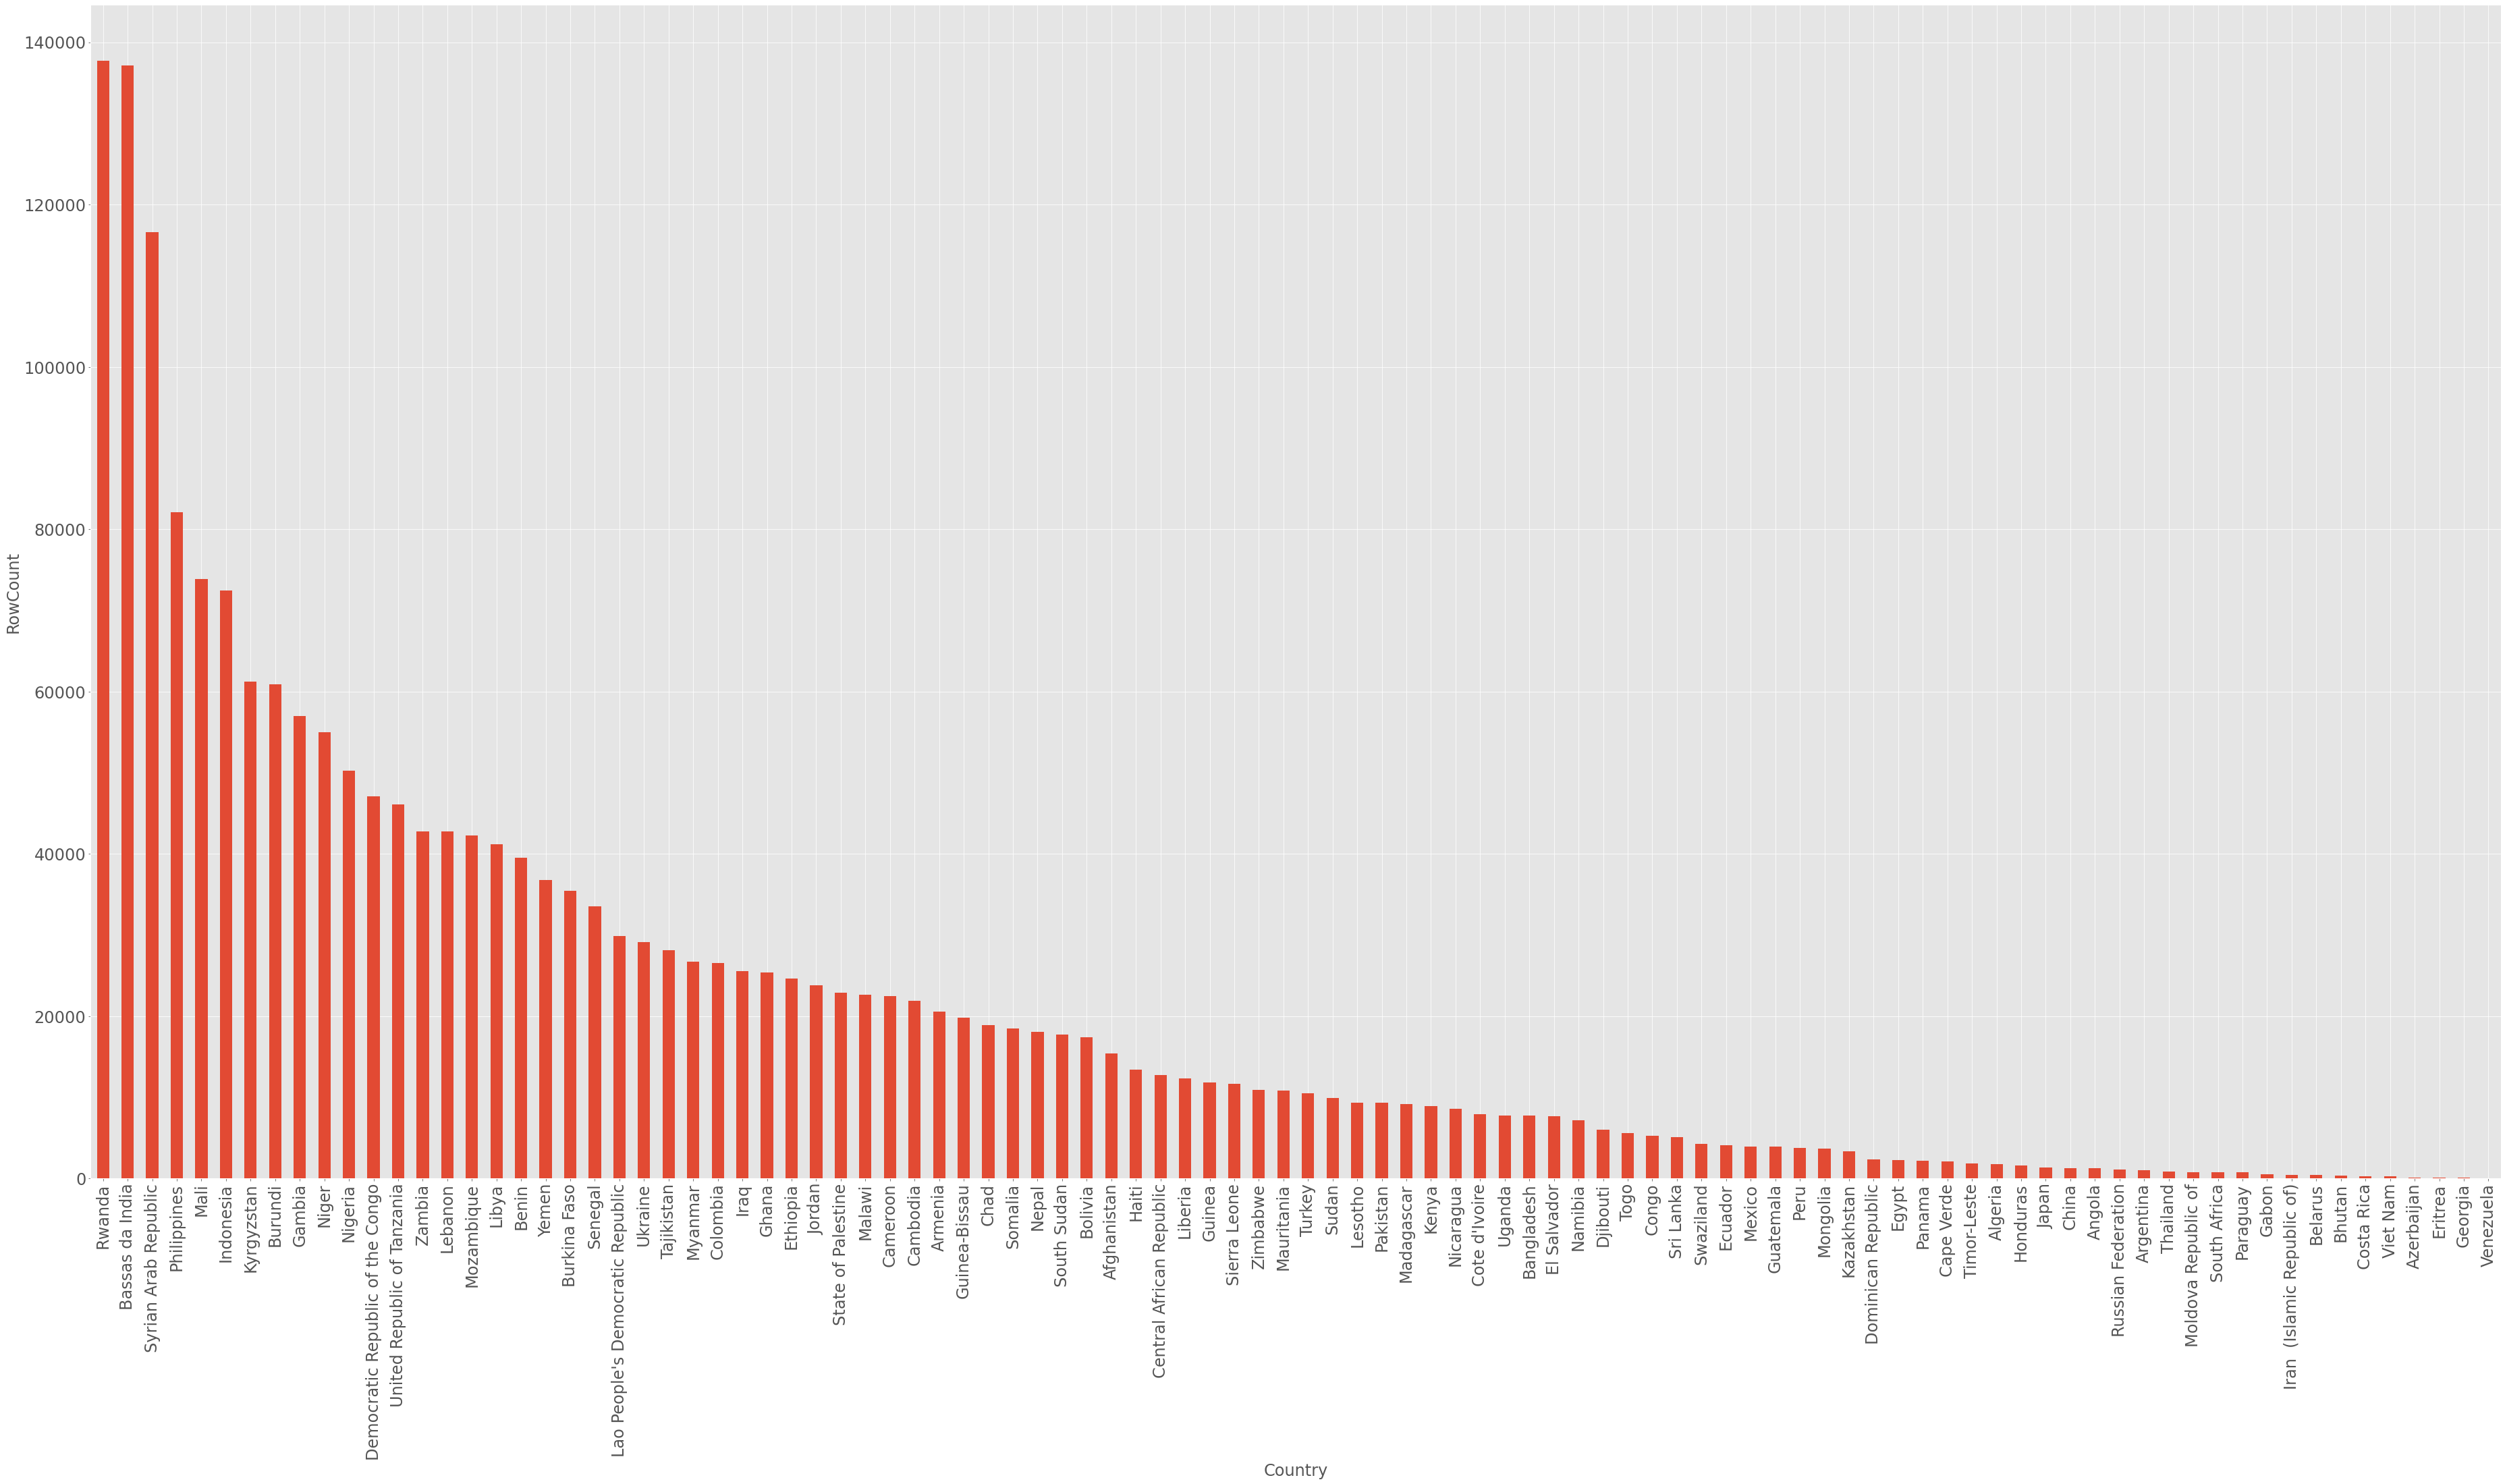

In [64]:
df1 = pd.DataFrame(listrows, columns = ['Country', 'RowCount'])
df1= df1.sort_values(by=['RowCount'],ascending=False)
ax= df1.plot(kind='bar', y = 'RowCount',x ='Country',    
    legend = False,figsize=(64,32), fontsize=24)
ax.set_xlabel("Country",fontsize=24)
ax.set_ylabel("RowCount",fontsize=24)
plt.show()

## Working with GDP data from GitHub 

In [151]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/GDP.csv'
df_gdp = pd.read_csv(url, 
                    #  index_col=0, 
                     encoding= 'latin-1' )
df_gdp = pd.melt(df_gdp, id_vars=["Country",
                           "Subject Descriptor",
                            "Units","Scale",
                            "Country/Series-specific Notes"
                            ],
                   var_name ="Year",value_name="Value"
              )
# cleaning Value column
df_gdp['Value'] = df_gdp["Value"].str.replace(',','')
df_gdp['Value'] = df_gdp["Value"].str.replace('--','')

# converting Value column to numeric
df_gdp['Value'] = pd.to_numeric(df_gdp["Value"])

# Dropping attributes
df_gdp = df_gdp.drop(['Subject Descriptor',
                      'Country/Series-specific Notes' ,
                      'Scale',
                      
                      ], axis = 1)
# ///////////////////////////////////
# replacing null values with mean

# df_gdp = df_gdp['Value'].fillna(df_gdp.groupby([
#         'Country',
#         'Year'
# ])['Value'].transform('mean'), inplace = True)
# df_gdp = df_gdp[df_gdp['Value']!='NaN']

# removing zeroes

df_gdp.dropna(inplace= True)
df_gdp['Year'] = pd.to_numeric(df_gdp["Year"])
df_gdp=df_gdp[df_gdp.Year != 'Estimates Start After']# Droping non year values from the file 

# print(df_gdp.shape)
# print('null values\n',df_gdp.isnull().sum())
# print(df_gdp.info())
# df_gdp.head()


In [152]:
print(df_gdp.shape)
print('null values\n',df_gdp.isnull().sum())
print(df_gdp.info())
print(df_gdp.nunique())
df_gdp.head()

(5811, 4)
null values
 Country    0
Units      0
Year       0
Value      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5811 entries, 1 to 6135
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  5811 non-null   object 
 1   Units    5811 non-null   object 
 2   Year     5811 non-null   int64  
 3   Value    5811 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 227.0+ KB
None
Country     196
Units         1
Year         31
Value      5688
dtype: int64


,Country,Units,Year,Value
1,Albania,National currency,1991,252.921
2,Algeria,National currency,1991,3393.450
4,Angola,National currency,1991,283.298
5,Antigua and Barbuda,National currency,1991,1.708
6,Argentina,National currency,1991,350.738


## RAMILA CODE START - GDP PIVOT

In [10]:
## Ramila Code
# url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/GDP.csv'
# df_gdp = pd.read_csv(url, encoding= 'latin-1' )
# df_gdp = df_gdp.melt(id_vars=[ "Country","Subject Descriptor","Units","Scale","Country/Series-specific Notes"],var_name="Year",value_name="Value")
df_gdp.tail()



,Country,Units,Year,Value
6131,Vietnam,National currency,2021,5176083.150
6132,West Bank and Gaza,National currency,2021,56.894
6133,Yemen,National currency,2021,206.931
6134,Zambia,National currency,2021,138.803
6135,Zimbabwe,National currency,2021,19.040


In [11]:
df_gdp=df_gdp.dropna() # Droping all NAN values from the file 
df_gdp.head()



,Country,Units,Year,Value
1,Albania,National currency,1991,252.921
2,Algeria,National currency,1991,3393.450
4,Angola,National currency,1991,283.298
5,Antigua and Barbuda,National currency,1991,1.708
6,Argentina,National currency,1991,350.738


In [12]:
# df_gdp=df_gdp[df_gdp.Year != 'Estimates Start After']# Droping non year values from the file 
# df_gdp

In [13]:
df_gdp.Year.unique () # all values are Year 

array(['1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype=object)

## RAMILA CODE END - GDP PIVOT

## loading cost of living dataset from GitHUb

In [14]:
url1 = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/cost%20of%20living%202020.csv'
df_cost = pd.read_csv(url1,index_col=0)
df_cost = df_cost.drop(['Unnamed: 9',
                      
                      ], axis = 1)
description(df_cost)

(135, 8)
null values
 Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
McMeal($)                         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 1 to 135
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         135 non-null    object 
 1   Cost of Living Index            135 non-null    float64
 2   Rent Index                      135 non-null    float64
 3   Cost of Living Plus Rent Index  135 non-null    float64
 4   Groceries Index                 135 non-null    float64
 5   Restaurant Price Index          135 non-null    float64
 6   Local Purchasing Power Index    135 non-null    float64
 7   McMeal($)          

## LOADING Countries list by region [Dimension Table]

In [15]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/UNSD%20%E2%80%94%20Methodology.csv '
df_countries = pd.read_csv(url, index_col=0)
df_region = df_countries[['Region Name','Intermediate Region Name','Country or Area'] ]
df_region = df_region.rename( columns = {'Region Name': 'Continent', 'Intermediate Region Name': 'Region', 'Country or Area': 'Country' })
df_region.head()


,Continent,Region,Country
Global Code,,,
1,Africa,Northern Africa,Algeria
1,Africa,Northern Africa,Egypt
1,Africa,Northern Africa,Libya
1,Africa,Northern Africa,Morocco
1,Africa,Northern Africa,Sudan


In [16]:
# Removing duplicates from country list
df_region = df_region.drop_duplicates(subset = ['Country'])


In [17]:
df_region.dropna(inplace=True)

In [18]:
df_region.isnull().sum()

Continent    0
Region       0
Country      0
dtype: int64

In [19]:
df = data.copy()
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


## Child Mortality Upload 

In [20]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/child-deaths-igme-data.csv'
df_childMort = pd.read_csv(url, index_col=0)
# Dropping empty values in Code columns. The zeroes belong to continents and regions.
df_childMort.dropna(inplace= True)

description(df_childMort)

(10017, 3)
null values
 Code                           0
Year                           0
Number of under-five deaths    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 10017 entries, Afghanistan to Zimbabwe
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Code                         10017 non-null  object
 1   Year                         10017 non-null  int64 
 2   Number of under-five deaths  10017 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 313.0+ KB
None
            Code  Year  Number of under-five deaths
Entity                                             
Afghanistan  AFG  1967                       161588
Afghanistan  AFG  1968                       162629
Afghanistan  AFG  1969                       163529
Afghanistan  AFG  1970                       164463
Afghanistan  AFG  1971                       165306


## Birth rate vs Death rate Upload

In [21]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/birth-rate-vs-death-rate.csv'
df_BirthDeathRate = pd.read_csv(url, index_col=0)
df_BirthDeathRate = df_BirthDeathRate.loc[df_BirthDeathRate['Code'] != 'NaN']
df_BirthDeathRate.dropna(inplace= True)

description(df_BirthDeathRate)

(203, 6)
null values
 Code                                    0
Year                                    0
Death rate, crude (per 1,000 people)    0
Birth rate, crude (per 1,000 people)    0
Population (historical estimates)       0
Continent                               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Code                                  203 non-null    object 
 1   Year                                  203 non-null    int64  
 2   Death rate, crude (per 1,000 people)  203 non-null    float64
 3   Birth rate, crude (per 1,000 people)  203 non-null    float64
 4   Population (historical estimates)     203 non-null    float64
 5   Continent                             203 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 11.1+ KB


## Fertility rate 

In [22]:
url = 'https://raw.githubusercontent.com/MaxSMCON/Group_2/main/Data%20Storage/birth-rate-vs-death-rate.csv'
df_BirthDeathRate = pd.read_csv(url, index_col=0)
df_BirthDeathRate = df_BirthDeathRate.loc[df_BirthDeathRate['Code'] != 'NaN']
df_BirthDeathRate.dropna(inplace= True)

description(df_BirthDeathRate)

(203, 6)
null values
 Code                                    0
Year                                    0
Death rate, crude (per 1,000 people)    0
Birth rate, crude (per 1,000 people)    0
Population (historical estimates)       0
Continent                               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, Afghanistan to Zimbabwe
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Code                                  203 non-null    object 
 1   Year                                  203 non-null    int64  
 2   Death rate, crude (per 1,000 people)  203 non-null    float64
 3   Birth rate, crude (per 1,000 people)  203 non-null    float64
 4   Population (historical estimates)     203 non-null    float64
 5   Continent                             203 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 11.1+ KB


## Create Date Column

In [23]:
# Create a Date Column
df["Date"] = [  y+ " " +x for x,y in list(zip(df["mp_month"].astype(str).values, df["mp_year"].astype(str).values)) ]
df["Date"] = pd.to_datetime(df["Date"])

In [24]:
df = df.set_index("Date")

## Renaming columns

In [25]:
df = df.rename(columns = {'adm0_name' : 'Country', 'mkt_name': 'city',} )
df = df.drop(columns= {'adm1_name'})
df.head()


,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
Date,,,,,,,,,,,,,,,,,
2014-01-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
2014-02-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2014-03-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
2014-04-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
2014-05-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


## Leaving comodity names with the first words

In [74]:
df['cm_name'] = df['cm_name'].str.split(" ", 1, expand = True)
df['cm_name'].head()

0    Bread
1    Bread
2    Bread
3    Bread
4    Bread
Name: cm_name, dtype: object

In [27]:
df.head()

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
Date,,,,,,,,,,,,,,,,,
2014-01-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
2014-02-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2014-03-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
2014-04-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
2014-05-01,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [28]:
df['cm_name'].unique()

array(['Bread', 'Wheat', 'Rice', 'Wage', 'Livestock', 'Fuel', 'Exchange',
       'Oil', 'Sugar', 'Pulses', 'Salt', 'Beans', 'Milk', 'Potatoes',
       'Eggs', 'Meat', 'Lentils', 'Pasta', 'Tomatoes', 'Cheese',
       'Carrots', 'Onions', 'Bananas', 'Tea', 'Fish', 'Apples', 'Oranges',
       'Cassava', 'Maize', 'Peas', 'Cabbage', 'Cucumbers', 'Beetroots',
       'Buckwheat', 'Ghee', 'Chickpeas', 'Sorghum', 'Millet', 'Sweet',
       'Yam', 'Plantains', 'Soybeans', 'Lemons', 'Papaya', 'Okra',
       'Groundnuts', 'Peppers', 'Coconut', 'Leafy', 'Shrimps', 'Taro',
       'Snail', 'Noodles', 'Quinoa', 'Avocados', 'Eggplants', 'Snake',
       'Water', 'Wax', 'Prawn', 'Chicken', 'Cocoyam', 'Sesame', 'Cowpeas',
       'Squashes', 'Charcoal', 'Laundry', 'Peanut', 'Garlic', 'Cocoa',
       'Coffee', 'Cauliflower', 'Spinach', 'Blackberry', 'Broccoli',
       'Mangoes', 'Pumpkin', 'Guava', 'Passion', 'Barley', 'Cashew',
       'Cornstarch', 'Cotton', 'Transport', 'Lettuce', 'Pineapples',
       'Wat

In [29]:
#Drop mp_commoditysource columns
df.drop('mp_commoditysource', inplace=True, axis=1)
df.isnull().sum()
# No more null values 


adm0_id     0
Country     0
adm1_id     0
mkt_id      0
city        0
cm_id       0
cm_name     0
cur_id      0
cur_name    0
pt_id       0
pt_name     0
um_id       0
um_name     0
mp_month    0
mp_year     0
mp_price    0
dtype: int64

# RAMILA REVISED THE PIVOT 

In [127]:
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,um_name1,um_name2
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN,KG,None
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN,KG,None
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN,KG,None
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN,KG,None
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN,KG,None


In [122]:
df_pivot = pd.pivot_table(df, index = [
                                      #  'adm1_name', 
                                       'cm_name', 
                                      #  'mp_year',
                                      #  'um_name'
                                       ], 
                          values = 'mp_price', aggfunc = ['mean', 
                                                            'std',
                                                          'count',
                                                          ]) # getting an average price per year, per Unit of Measure
df_pivot.head()


,mean,std,count
,mp_price,mp_price,mp_price
Alcohol,1697.511521,993.372349,917
Anchovies,134.483665,50.459662,805
Apples,465.933995,744.514729,9581
Avocados,257.780966,175.087565,3354
Bananas,441.460303,779.271434,18797


In [126]:
dfkk = df_pivot.reindex(df_pivot['count'].sort_values(by = 'mp_price', ascending = False).index)
dfkk.head(20)

,mean,std,count
,mp_price,mp_price,mp_price
Rice,3638.908556,36069.067547,250669
Maize,425.472241,1790.451524,174253
Meat,29221.971382,388805.325010,118460
Oil,2629.892337,5232.444024,117255
Beans,4646.598406,25694.437662,109130
Wheat,3215.077869,27926.223019,96749
Sorghum,1359.300475,4276.435051,85125
Sugar,2622.458055,5396.009054,67818
Millet,1166.103848,11228.809666,64038


### Based on our analysis rice is most common commodity and we are going to examine it.

## Merging

In [133]:
print(df_childMort.columns)
df_region.columns

Index(['Code', 'Year', 'Number of under-five deaths'], dtype='object')


Index(['Continent', 'Region', 'Country'], dtype='object')

In [139]:

df_child = pd.merge(
    df_childMort,
    df_region,
    left_on=('Entity'),
    right_on=('Country'),
    
    how='left',
    # on = 'Country',
    validate = 'many_to_one'
)
df_child.head()

,Code,Year,Number of under-five deaths,Continent,Region,Country
0,AFG,1967,161588,Asia,Southern Asia,Afghanistan
1,AFG,1968,162629,Asia,Southern Asia,Afghanistan
2,AFG,1969,163529,Asia,Southern Asia,Afghanistan
3,AFG,1970,164463,Asia,Southern Asia,Afghanistan
4,AFG,1971,165306,Asia,Southern Asia,Afghanistan


In [140]:
df_BirthDeathRate= pd.merge(
    df_BirthDeathRate,
    df_region,
    left_on=('Entity'),
    right_on=('Country'),
    
    how='left',
    # on = 'Country',
    validate = 'many_to_one'
)
df_BirthDeathRate.head()

,Code,Year,"Death rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)",Population (historical estimates),Continent_x,Continent_y,Region,Country
0,AFG,2015,6.929,34.809,34413603.0,Asia,Asia,Southern Asia,Afghanistan
1,ALB,2015,7.367,12.197,2890524.0,Europe,Europe,Southern Europe,Albania
2,DZA,2015,4.715,25.481,39728020.0,Africa,Africa,Northern Africa,Algeria
3,AGO,2015,9.052,42.520,27884380.0,Africa,Africa,Middle Africa,Angola
4,ATG,2015,6.227,15.883,93571.0,North America,Americas,Caribbean,Antigua and Barbuda


In [143]:
df_gdp= pd.merge(
    df_gdp,
    df_region,
    left_on=('Country'),
    right_on=('Country'),
    
    how='left',
    # on = 'Country',
    validate = 'many_to_one'
)
df_gdp.shape

(5811, 10)

In [147]:
df.gdp.type()

AttributeError: ignored

## Merging Everything

In [157]:
df_everything= pd.merge(
    df_gdp,
    df_BirthDeathRate, 
    left_on=('Country', 'Year'),
    right_on=('Country', 'Year'),
    
    how='left',
    # on = 'Country',
    validate = 'many_to_many'
)
df_everything.head()

,Country,Units,Year,Value,Code,"Death rate, crude (per 1,000 people)","Birth rate, crude (per 1,000 people)",Population (historical estimates),Continent_x,Continent_y,Region
0,Albania,National currency,1991,252.921,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,National currency,1991,3393.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,National currency,1991,283.298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Antigua and Barbuda,National currency,1991,1.708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,National currency,1991,350.738,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
description(df_everything)

(5811, 11)
null values
 Country                                    0
Units                                      0
Year                                       0
Value                                      0
Code                                    5653
Death rate, crude (per 1,000 people)    5653
Birth rate, crude (per 1,000 people)    5653
Population (historical estimates)       5653
Continent_x                             5653
Continent_y                             5653
Region                                  5653
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5811 entries, 0 to 5810
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               5811 non-null   object 
 1   Units                                 5811 non-null   object 
 2   Year                                  5811 non-null   int64  
 3   Value                

## RICK TO ADD CONVERSION CODE TO THIS TABLE df_pivot

## JAMES PIVOT CODE 

In [176]:
description(df)

(2050638, 20)
null values
 adm0_id                     0
adm0_name                   0
adm1_id                     0
adm1_name              611016
mkt_id                      0
mkt_name                    0
cm_id                       0
cm_name                     0
cur_id                      0
cur_name                    0
pt_id                       0
pt_name                     0
um_id                       0
um_name                     0
mp_month                    0
mp_year                     0
mp_price                    0
mp_commoditysource    2050638
um_name1                    0
um_name2              1800004
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050638 entries, 0 to 2050637
Data columns (total 20 columns):
 #   Column              Dtype  
---  ------              -----  
 0   adm0_id             float64
 1   adm0_name           object 
 2   adm1_id             int64  
 3   adm1_name           object 
 4   mkt_id              int64  
 5   mkt_name   

In [177]:
country_df = df_retail[['Country','mp_year','cm_name','mp_price']]
country_df = country_df.groupby(by=['Country','mp_year','cm_name']).mean().reset_index(level=['Country', 'mp_year','cm_name'])
country_df = country_df.pivot(index=["Country", "mp_year"], columns=["cm_name"],values="mp_price").reset_index(level=['Country', 'mp_year'])
country_df.reset_index(inplace=True,drop=True)
country_df.head()

cm_name,Country,mp_year,Alcohol,Anchovies,Apples,Avocados,Bananas,Barley,Batteries,Beans,Beans(mash),Beetroots,Bitter,Bitterball,Bleach,Bottle,Bread,Buckwheat,Bulgur,Butter,Cabbage,Calamansi,Candles,Cane,Carrots,Cashew,Cassava,Cauliflower,Charcoal,Cheese,Chicken,Chickpeas,Chili,Choko,Cocoa,Coconut,Cocoyam,Coffee,Cooking,Corn,...,Pumpkin,Radish,Rice,Salt,Sanitary,Semolina,Sesame,Shampoo,Shrimp,Shrimps,Snail,Snake,Sorghum,Sour,Soybeans,Spinach,Squashes,Straw,Sugar,Surgical,Sweet,Swiss,Taro,Tea,Teff,Tomatoes,Toothbrush,Toothpaste,Tortilla,Transport,Wage,Walnuts,Water,Watermelons,Wax,Wheat,Yam,Yeast,Yogurt,Zucchini
0,Afghanistan,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.213750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85597.191667,NaN,NaN,NaN,NaN,13.159687,NaN,NaN,NaN,NaN
1,Afghanistan,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.522667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79171.590822,NaN,NaN,NaN,NaN,11.023444,NaN,NaN,NaN,NaN
2,Afghanistan,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.587872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79536.394366,NaN,NaN,NaN,NaN,6.651875,NaN,NaN,NaN,NaN
3,Afghanistan,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.016667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.117771,NaN,NaN,NaN,NaN
4,Afghanistan,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.622917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.038876,NaN,NaN,NaN,NaN


## Retail prices

In [33]:
df_retail = df.loc[df['pt_name'] == 'Retail']
df_retail.nunique()

adm0_id         89
Country         89
adm1_id        818
mkt_id        3083
city          3058
cm_id          587
cm_name        148
cur_id           1
cur_name        76
pt_id            1
pt_name          1
um_id          103
um_name        103
mp_month        12
mp_year         32
mp_price    213111
dtype: int64

## Currency Conversion Table

In [34]:
df_currency = df.loc[df['cm_name'] == 'Exchange']
df_currency.nunique()

adm0_id       16
Country       16
adm1_id      146
mkt_id       329
city         323
cm_id          2
cm_name        1
cur_id         1
cur_name      16
pt_id          1
pt_name        1
um_id          1
um_name        1
mp_month      12
mp_year       11
mp_price    3351
dtype: int64

## Reshaping table

In [35]:
# Pivoting tables under construction
# df = df.pivot(columns = 'cm_name', values = 'pt_id')
# df.head()

## Merging food prices with country region

In [36]:

df5 = pd.merge(
    df_retail,
    df_region,
    # left_on=('Country'),
    # right_on=('Country'),
    
    how='left',
    on = 'Country',
    validate = 'many_to_one'
)
df5.head()

,adm0_id,Country,adm1_id,mkt_id,city,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,Continent,Region
0,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,1,2014,50.0,Asia,Southern Asia
1,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,2,2014,50.0,Asia,Southern Asia
2,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,3,2014,50.0,Asia,Southern Asia
3,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,4,2014,50.0,Asia,Southern Asia
4,1.0,Afghanistan,272,266,Fayzabad,55,Bread,0.0,AFN,15,Retail,5,KG,5,2014,50.0,Asia,Southern Asia


In [37]:
# Merge Check
print(df_retail.shape)
df5.shape

(1878421, 16)


(1878421, 18)

In [38]:
df5.isnull().sum()

adm0_id           0
Country           0
adm1_id           0
mkt_id            0
city              0
cm_id             0
cm_name           0
cur_id            0
cur_name          0
pt_id             0
pt_name           0
um_id             0
um_name           0
mp_month          0
mp_year           0
mp_price          0
Continent    162596
Region       162596
dtype: int64

## Group by Continent, Region, Country

In [166]:
df5.columns

Index(['adm0_id', 'Country', 'adm1_id', 'mkt_id', 'city', 'cm_id', 'cm_name',
       'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name',
       'mp_month', 'mp_year', 'mp_price', 'Continent', 'Region'],
      dtype='object')

In [168]:
df5 = df5.groupby(['adm0_id', 'Country', 'adm1_id', 'mkt_id', 'city', 'cm_id', 'cm_name',
       'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name',
       'mp_year', 'Continent', 'Region'
             ])['mp_price'].agg({'mean'}).round(1)


In [169]:
df5.head()

mean
adm0_id Country     adm1_id mkt_id city     cm_id cm_name cur_id cur_name pt_id pt_name um_id um_name mp_year Continent Region             
1.0     Afghanistan 272     266    Fayzabad 55    Bread   0.0    AFN      15    Retail  5     KG      2014    Asia      Southern Asia  50.0
                                                                                                      2015    Asia      Southern Asia  52.7
                                                                                                      2016    Asia      Southern Asia  51.0
                                                                                                      2017    Asia      Southern Asia  50.0
                                                                                                      2018    Asia      Southern Asia  50.4

In [161]:
df_gdp.head()

,Country,Units,Year,Value
1,Albania,National currency,1991,252.921
2,Algeria,National currency,1991,3393.450
4,Angola,National currency,1991,283.298
5,Antigua and Barbuda,National currency,1991,1.708
6,Argentina,National currency,1991,350.738


In [179]:
description(country_df)

(1305, 150)
null values
 cm_name
Country         0
mp_year         0
Alcohol      1303
Anchovies    1303
Apples       1229
             ... 
Wheat         619
Yam          1268
Yeast        1304
Yogurt       1280
Zucchini     1295
Length: 150, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Columns: 150 entries, Country to Zucchini
dtypes: float64(148), int64(1), object(1)
memory usage: 1.5+ MB
None
cm_name      Country  mp_year  Alcohol  Anchovies  ...  Yam  Yeast  Yogurt  Zucchini
0        Afghanistan     2000      NaN        NaN  ...  NaN    NaN     NaN       NaN
1        Afghanistan     2001      NaN        NaN  ...  NaN    NaN     NaN       NaN
2        Afghanistan     2002      NaN        NaN  ...  NaN    NaN     NaN       NaN
3        Afghanistan     2003      NaN        NaN  ...  NaN    NaN     NaN       NaN
4        Afghanistan     2004      NaN        NaN  ...  NaN    NaN     NaN       NaN

[5 rows x 150 columns]


In [195]:
df_every= pd.merge(    
    country_df,
    df_gdp,
    left_on=('Country', 'mp_year'),
    right_on=('Country', 'Year'),
    
    how='left',
    # on = 'Country',
    # validate = 'many_to_many'
)
df_every.head()

,Country,mp_year,Alcohol,Anchovies,Apples,Avocados,Bananas,Barley,Batteries,Beans,Beans(mash),Beetroots,Bitter,Bitterball,Bleach,Bottle,Bread,Buckwheat,Bulgur,Butter,Cabbage,Calamansi,Candles,Cane,Carrots,Cashew,Cassava,Cauliflower,Charcoal,Cheese,Chicken,Chickpeas,Chili,Choko,Cocoa,Coconut,Cocoyam,Coffee,Cooking,Corn,...,Salt,Sanitary,Semolina,Sesame,Shampoo,Shrimp,Shrimps,Snail,Snake,Sorghum,Sour,Soybeans,Spinach,Squashes,Straw,Sugar,Surgical,Sweet,Swiss,Taro,Tea,Teff,Tomatoes,Toothbrush,Toothpaste,Tortilla,Transport,Wage,Walnuts,Water,Watermelons,Wax,Wheat,Yam,Yeast,Yogurt,Zucchini,Units,Year,Value
0,Afghanistan,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.213750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85597.191667,NaN,NaN,NaN,NaN,13.159687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.522667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79171.590822,NaN,NaN,NaN,NaN,11.023444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.587872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79536.394366,NaN,NaN,NaN,NaN,6.651875,NaN,NaN,NaN,NaN,National currency,2002.0,453.484
3,Afghanistan,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.016667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.117771,NaN,NaN,NaN,NaN,National currency,2003.0,492.903
4,Afghanistan,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.622917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.038876,NaN,NaN,NaN,NaN,National currency,2004.0,496.209


In [193]:
# df_every =df_every.rename(columns = {'mp_year': 'Year', 'Value': 'GDP'})

# Final Merge

In [199]:
df_every= pd.merge(    
    df_every,
    df_BirthDeathRate,
    # df_childMort,
    left_on=('Country', 'mp_year'),
    right_on=('Country', 'Year'),
    
    how='left',
    # on = 'Country',
    # validate = 'many_to_many'
)
df_every.head()

,Country,mp_year,Alcohol,Anchovies,Apples,Avocados,Bananas,Barley,Batteries,Beans,Beans(mash),Beetroots,Bitter,Bitterball,Bleach,Bottle,Bread,Buckwheat,Bulgur,Butter,Cabbage,Calamansi,Candles,Cane,Carrots,Cashew,Cassava,Cauliflower,Charcoal,Cheese,Chicken,Chickpeas,Chili,Choko,Cocoa,Coconut,Cocoyam,Coffee,Cooking,Corn,...,Surgical,Sweet,Swiss,Taro,Tea,Teff,Tomatoes,Toothbrush,Toothpaste,Tortilla,Transport,Wage,Walnuts,Water,Watermelons,Wax,Wheat,Yam,Yeast,Yogurt,Zucchini,Units,Year_x,Value,Code_x,Year_y,"Death rate, crude (per 1,000 people)_x","Birth rate, crude (per 1,000 people)_x",Population (historical estimates)_x,Continent_x_x,Continent_y_x,Region_x,Code_y,Year,"Death rate, crude (per 1,000 people)_y","Birth rate, crude (per 1,000 people)_y",Population (historical estimates)_y,Continent_x_y,Continent_y_y,Region_y
0,Afghanistan,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.213750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85597.191667,NaN,NaN,NaN,NaN,13.159687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.522667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79171.590822,NaN,NaN,NaN,NaN,11.023444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.587872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79536.394366,NaN,NaN,NaN,NaN,6.651875,NaN,NaN,NaN,NaN,National currency,2002.0,453.484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.016667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.117771,NaN,NaN,NaN,NaN,National currency,2003.0,492.903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.622917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.038876,NaN,NaN,NaN,NaN,National currency,2004.0,496.209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
df_every= pd.merge(    
    df_every,
    # df_BirthDeathRate,
    df_childMort,
    left_on=('Country', 'mp_year'),
    right_on=('Country', 'Year'),
    
    how='left',
    # on = 'Country',
    # validate = 'many_to_many'
)
df_every.head()

KeyError: ignored

In [181]:
description(df_every)

(1305, 153)
null values
 Country         0
mp_year         0
Alcohol      1303
Anchovies    1303
Apples       1229
             ... 
Yogurt       1280
Zucchini     1295
Units         211
Year          211
Value         211
Length: 153, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 1304
Columns: 153 entries, Country to Value
dtypes: float64(150), int64(1), object(2)
memory usage: 1.5+ MB
None
       Country  mp_year  Alcohol  ...              Units    Year    Value
0  Afghanistan     2000      NaN  ...                NaN     NaN      NaN
1  Afghanistan     2001      NaN  ...                NaN     NaN      NaN
2  Afghanistan     2002      NaN  ...  National currency  2002.0  453.484
3  Afghanistan     2003      NaN  ...  National currency  2003.0  492.903
4  Afghanistan     2004      NaN  ...  National currency  2004.0  496.209

[5 rows x 153 columns]


In [ ]:
df5 = pd.merge(left=df,right=df2,left_on=('Country', 'Year'),right_on=('Country','Year'),how='left')

# Visual Inspection

<li> Dollar convertion as of today for better representation

<Figure size 432x288 with 0 Axes>

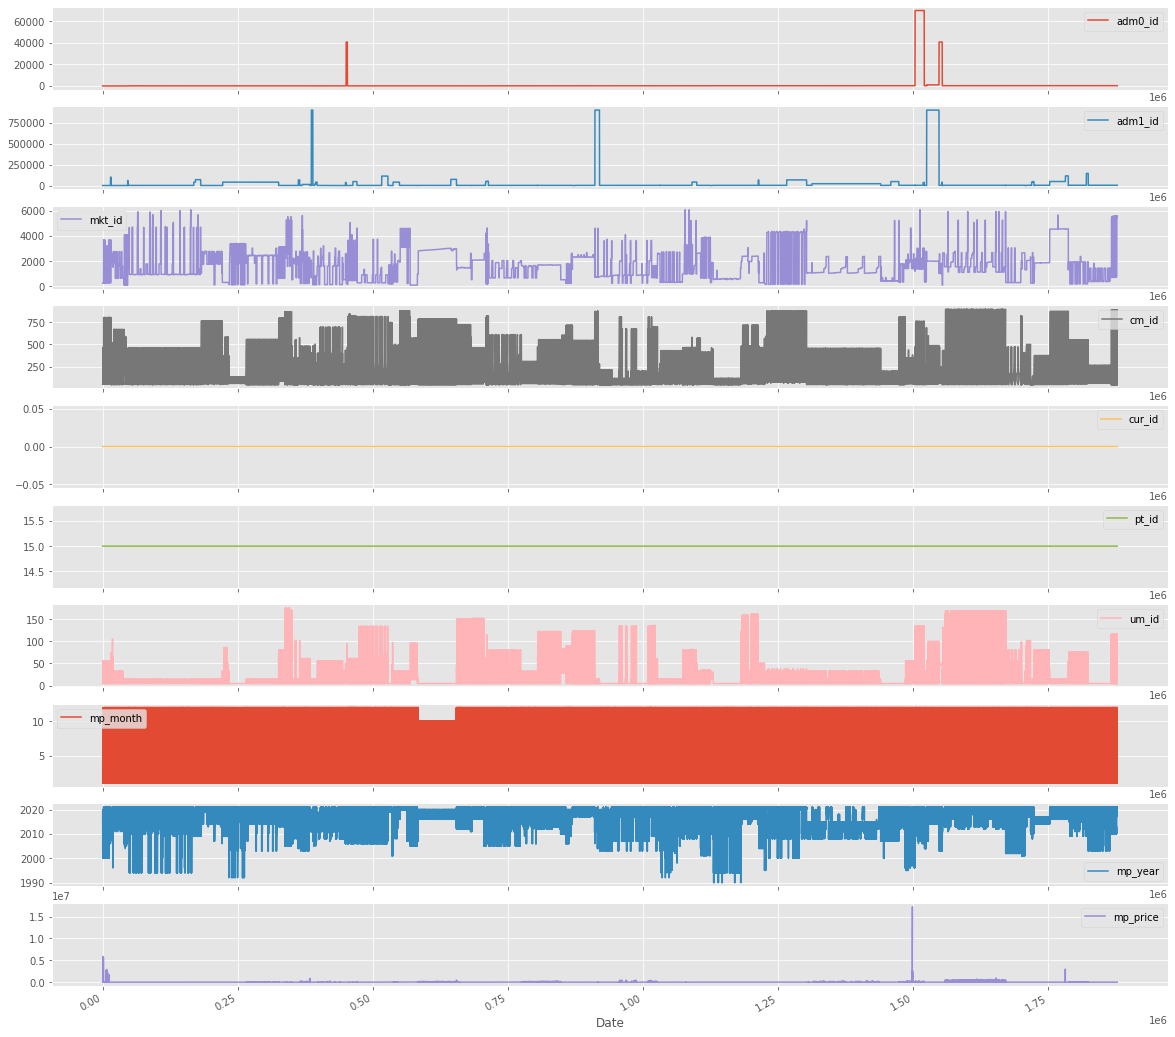

In [40]:
plt.figure()
df5.plot(subplots=True, figsize=(20,20))
plt.xlabel("Date");

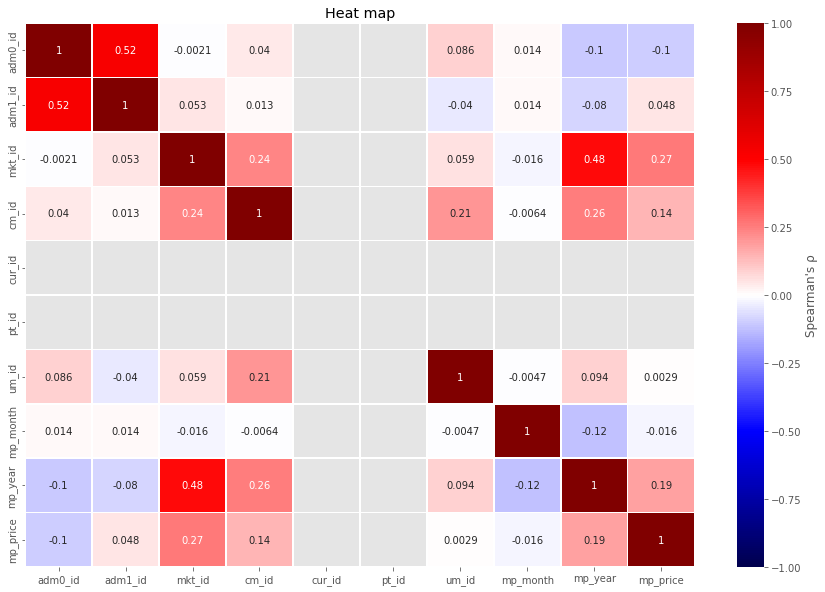

In [41]:
df_cm = df5.corr(method = 'spearman')

plt.figure(figsize=(15,10))
ax = sns.heatmap(df_cm, cmap="seismic", annot=True, linewidths=.5, cbar_kws={"label": "Spearman's ρ"}, vmin=-1, vmax=1);
ax.set_title("Heat map");